In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv('dataset.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


DAta Visualisation

In [ ]:
df['age']

0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: int64

Text(0.5, 1.0, 'Age Distribution')

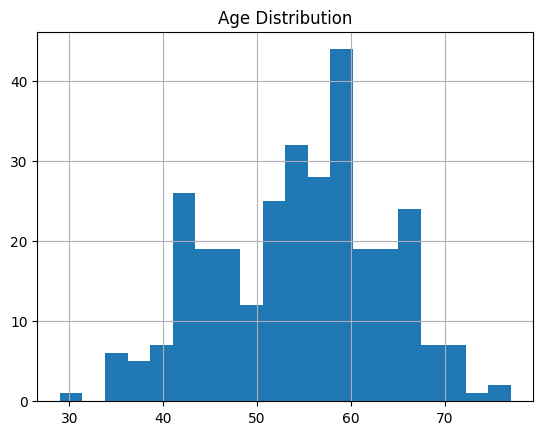

In [ ]:
df['age'].hist(bins=20)
plt.title('Age Distribution')

In [ ]:
df[df['chol']>300].shape

(43, 14)

Text(0.5, 1.0, 'patients with Respective Cholestral level')

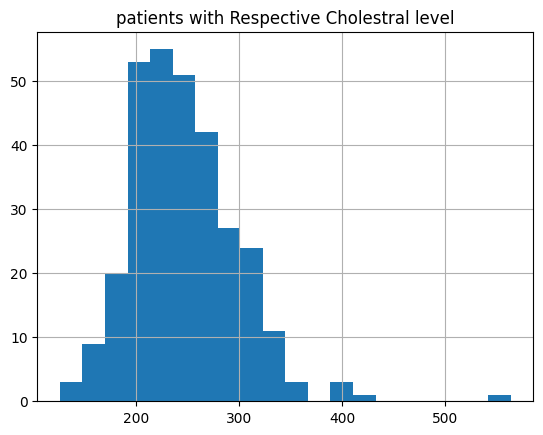

In [ ]:
df['chol'].hist(bins=20)
plt.title('patients with Respective Cholestral level' )

<ipython-input-11-98aac7b3082f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sex']==1]['chol'],label='Male')
<ipython-input-11-98aac7b3082f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sex']==0]['chol'],label='Female')


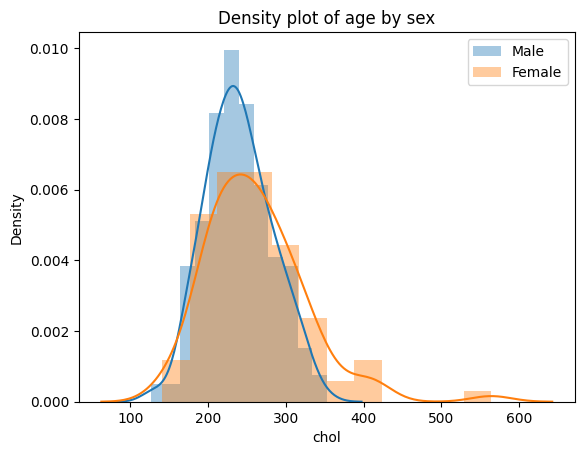

In [ ]:
sns.distplot(df[df['sex']==1]['chol'],label='Male')
sns.distplot(df[df['sex']==0]['chol'],label='Female')
plt.legend()
plt.title('Density plot of age by sex')
plt.show()

In [ ]:
ds=df['target'].value_counts()

In [ ]:
ds

1    165
0    138
Name: target, dtype: int64

Text(0.5, 1.0, 'count of target by sex')

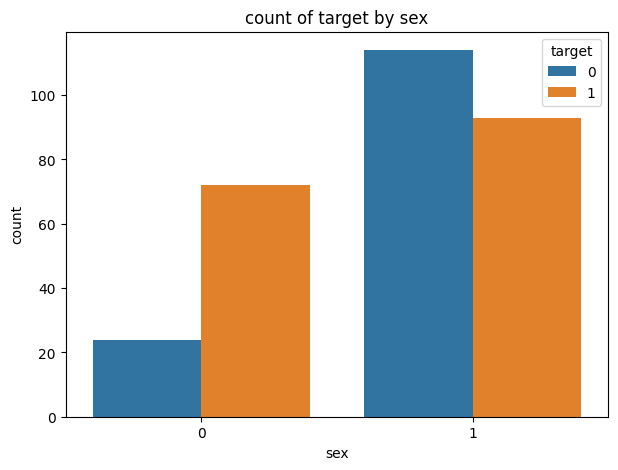

In [ ]:
from numpy.ma import count
from seaborn.categorical import countplot
plt.rcParams['figure.figsize']=(7,5)
sns.countplot(x='sex',hue='target',data=df);
plt.title('count of target by sex')

colleration

In [ ]:
filter=(df['target']==0) & (df['target']==1)
c=df[filter]

In [ ]:
c

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


<Axes: >

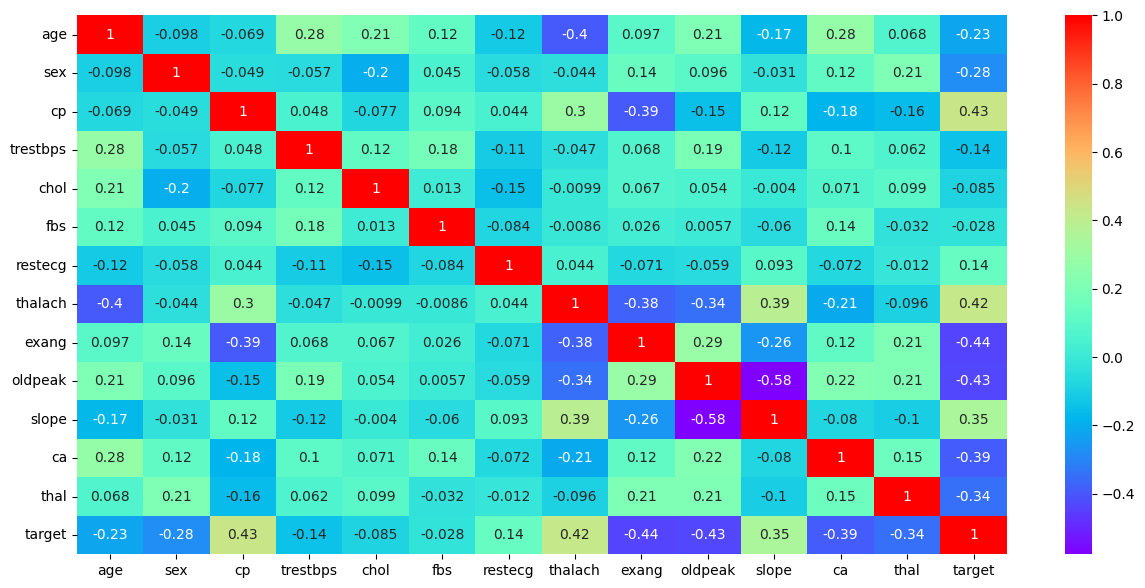

In [ ]:

plt.rcParams['figure.figsize']=(15,7)
sns.heatmap(df.corr(),annot=True,cmap='rainbow')

Feature selection

In [11]:
x=df.iloc[:,:-1]

In [12]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [13]:
y=df['target']

In [14]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,train_size=0.3)

In [17]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
23,61,1,2,150,243,1,1,137,1,1.0,1,0,2
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3
148,44,1,2,120,226,0,1,169,0,0.0,2,0,2
143,67,0,0,106,223,0,1,142,0,0.3,2,2,2
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2


In [18]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
141,43,1,0,115,303,0,1,181,0,1.2,1,0,2


In [19]:
y_train

23     1
250    0
148    1
143    1
78     1
      ..
251    0
192    0
117    1
47     1
172    0
Name: target, Length: 90, dtype: int64

In [ ]:
y_test

225    0
152    1
228    0
201    0
52     1
      ..
48     1
85     1
300    0
141    1
207    0
Name: target, Length: 213, dtype: int64

In [20]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log=LogisticRegression()


In [ ]:
log.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
log_pred=log.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
accuracy_score(log_pred,y_test)

0.8215962441314554

In [ ]:
confusion_matrix(log_pred,y_test)

array([[ 71,  13],
       [ 25, 104]])

In [ ]:
def plot_confusion_matrix(predict,actual,label):
   print(f'{label}Confusion_matrix' )
   cf=confusion_matrix(predict,actual)
   sns.heatmap(cf,annot=True,fmt='G')
   plt.show()

TestConfusion_matrix


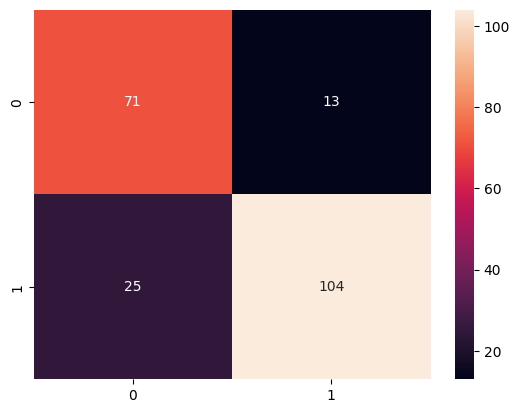

In [ ]:
plot_confusion_matrix(log_pred,y_test,'Test')

In [ ]:
from sklearn. metrics import precision_score


In [ ]:
precision_score(log_pred,y_test)

0.8888888888888888

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall_score(log_pred,y_test)

0.8062015503875969

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(log_pred,y_test)

0.8455284552845528

Decision tree

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=3.0,random_state=30)

In [ ]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
23,61,1,2,150,243,1,1,137,1,1.0,1,0,2
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3
148,44,1,2,120,226,0,1,169,0,0.0,2,0,2
143,67,0,0,106,223,0,1,142,0,0.3,2,2,2
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2


In [ ]:
y_test

225    0
152    1
228    0
201    0
52     1
      ..
48     1
85     1
300    0
141    1
207    0
Name: target, Length: 213, dtype: int64

In [ ]:
y_train

23     1
250    0
148    1
143    1
78     1
      ..
251    0
192    0
117    1
47     1
172    0
Name: target, Length: 90, dtype: int64

In [ ]:
y_test

225    0
152    1
228    0
201    0
52     1
      ..
48     1
85     1
300    0
141    1
207    0
Name: target, Length: 213, dtype: int64

In [ ]:
from sklearn.tree import  DecisionTreeClassifier

In [ ]:
Dt=DecisionTreeClassifier()

In [ ]:
Dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
Dt_pred=Dt.predict(x_test)

In [ ]:
accuracy_score(Dt_pred,y_test)

0.7746478873239436

In [ ]:
confusion_matrix(Dt_pred,y_test)

array([[78, 30],
       [18, 87]])

In [ ]:
def plot_confusion_matrix(predict,actual,label):
   print(f'{label}Confusion_matrix' )
   cf=confusion_matrix(predict,actual)
   sns.heatmap(cf,annot=True,fmt='G')
   plt.show()

TestConfusion_matrix


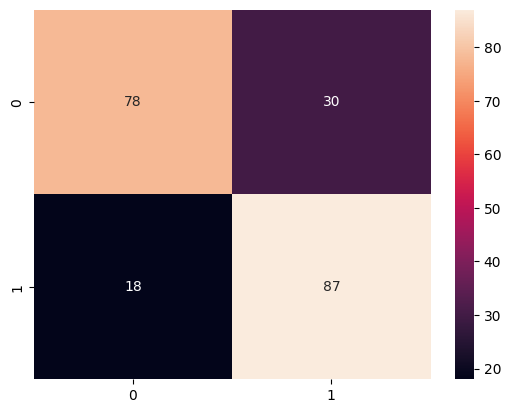

In [ ]:
plot_confusion_matrix(Dt_pred,y_test,'Test')

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
precision_score(Dt_pred,y_test)

0.7435897435897436

In [ ]:
recall_score(Dt_pred,y_test)

0.8285714285714286

In [ ]:
f1_score(Dt_pred,y_test)

0.7837837837837838

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,Dt_pred))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        96
           1       0.83      0.74      0.78       117

    accuracy                           0.77       213
   macro avg       0.78      0.78      0.77       213
weighted avg       0.78      0.77      0.78       213



[Text(0.5568181818181818, 0.9375, 'thal <= 2.5\ngini = 0.498\nsamples = 90\nvalue = [42, 48]\nclass = a'),
 Text(0.3409090909090909, 0.8125, 'thal <= 1.5\ngini = 0.4\nsamples = 58\nvalue = [16, 42]\nclass = a'),
 Text(0.29545454545454547, 0.6875, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]\nclass = t'),
 Text(0.38636363636363635, 0.6875, 'thalach <= 161.0\ngini = 0.311\nsamples = 52\nvalue = [10, 42]\nclass = a'),
 Text(0.3409090909090909, 0.5625, 'sex <= 0.5\ngini = 0.452\nsamples = 29\nvalue = [10, 19]\nclass = a'),
 Text(0.18181818181818182, 0.4375, 'fbs <= 0.5\ngini = 0.198\nsamples = 18\nvalue = [2, 16]\nclass = a'),
 Text(0.09090909090909091, 0.3125, 'exang <= 0.5\ngini = 0.117\nsamples = 16\nvalue = [1, 15]\nclass = a'),
 Text(0.045454545454545456, 0.1875, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]\nclass = a'),
 Text(0.13636363636363635, 0.1875, 'age <= 54.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = a'),
 Text(0.09090909090909091, 0.0625, 'gini = 0.0\nsamples = 2\nvalue 

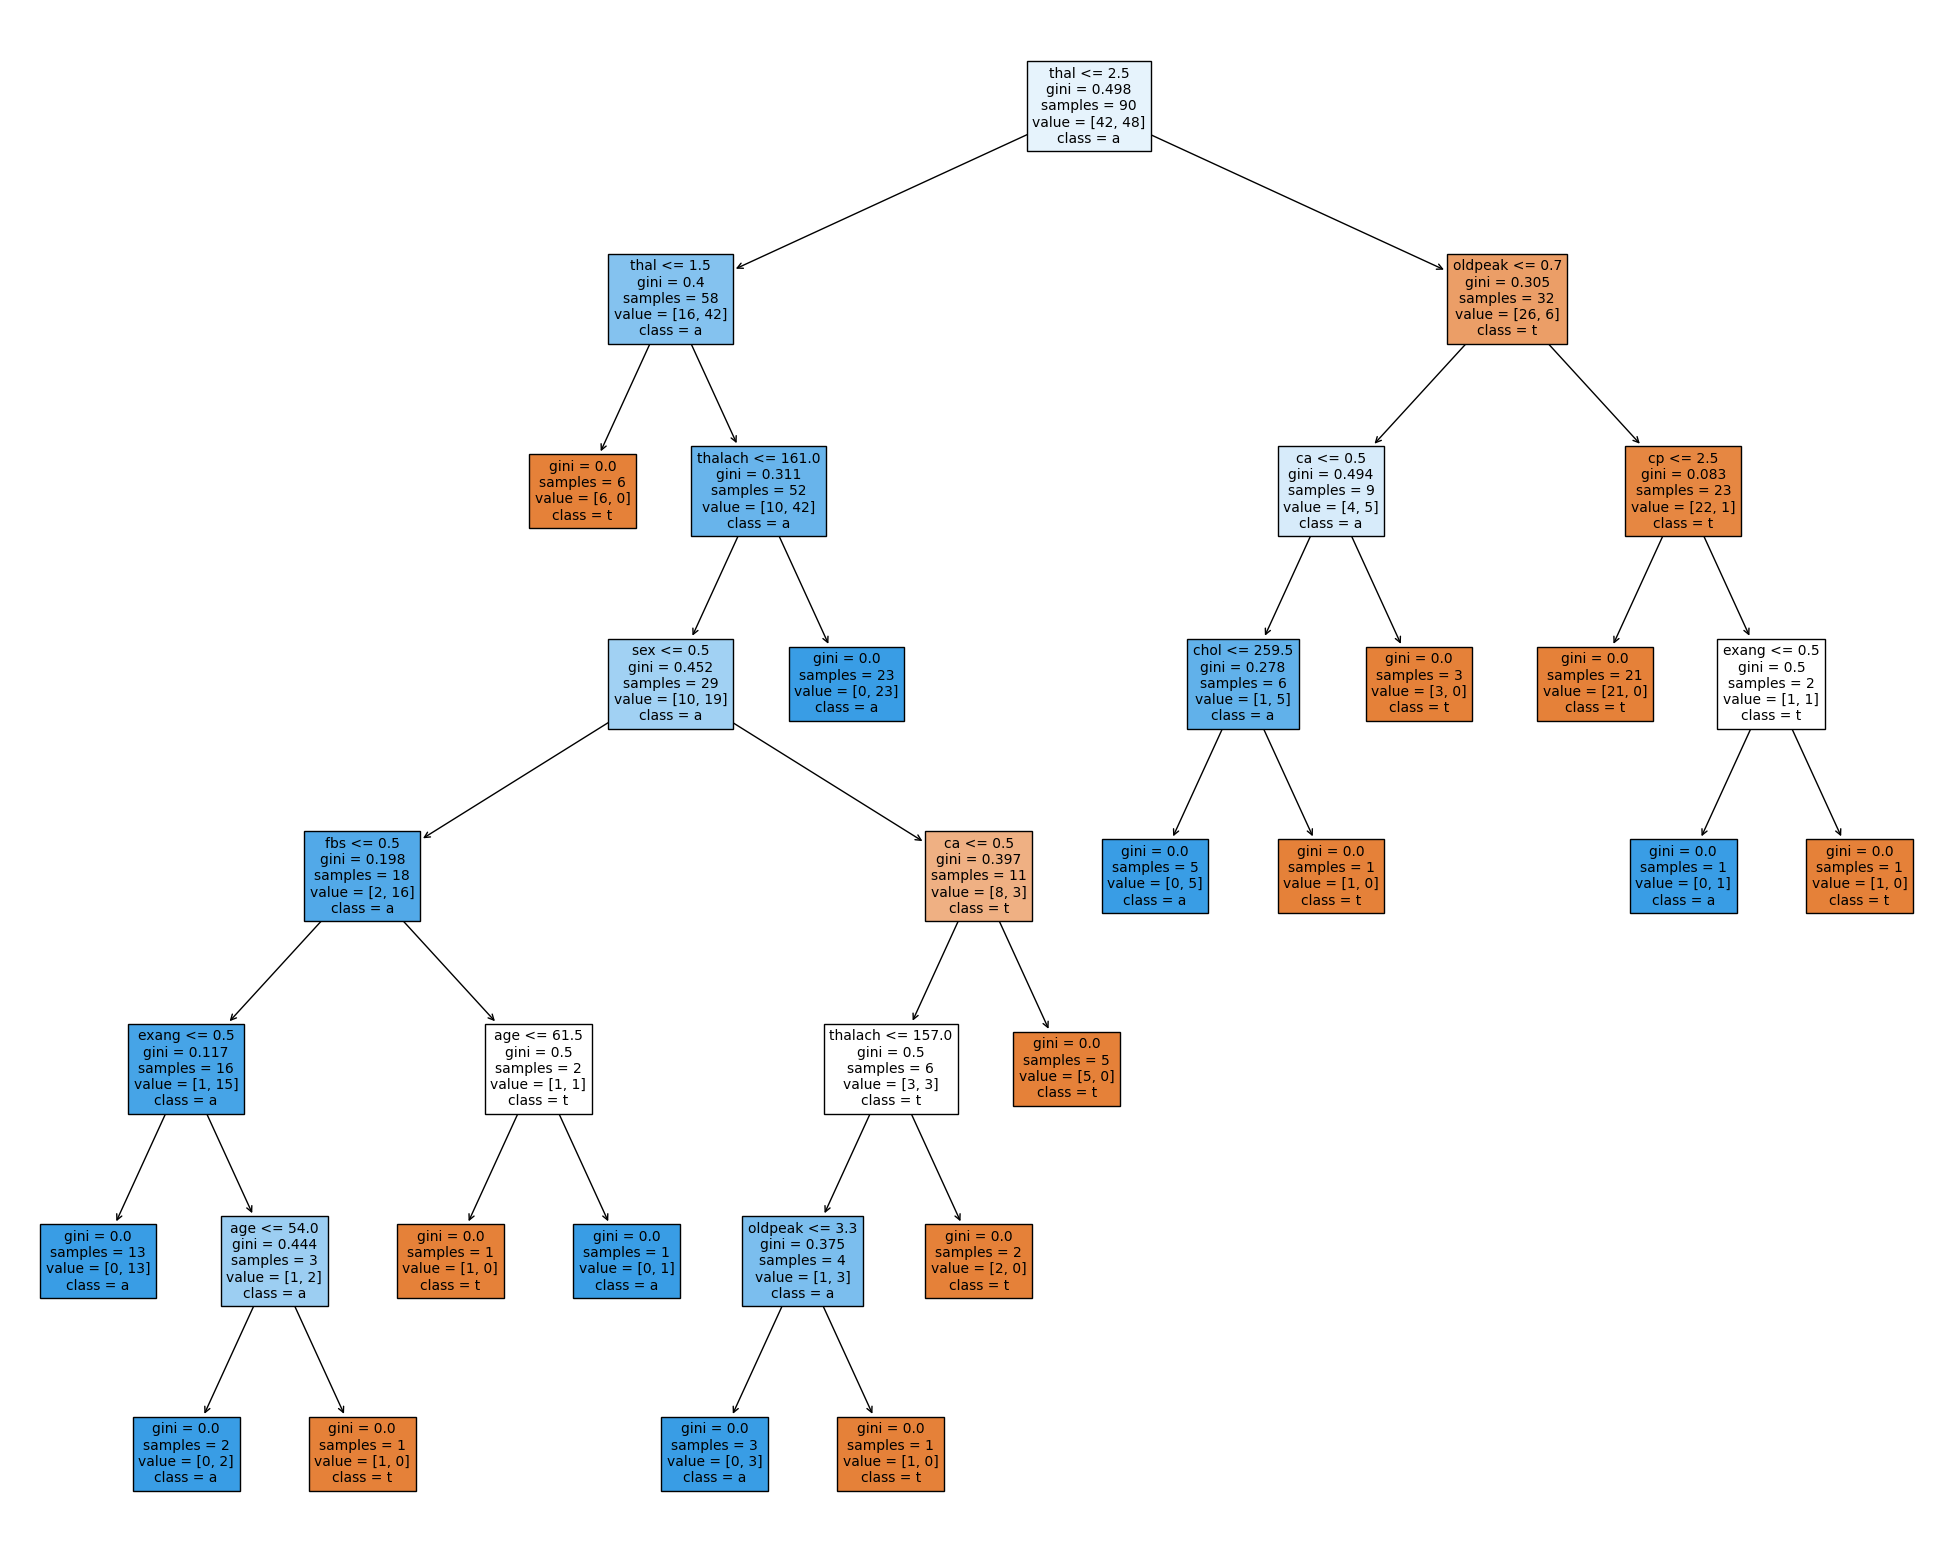

In [ ]:
fig=plt.figure(figsize=(25,20))
tree.plot_tree(Dt,feature_names=x.columns,class_names='target',filled=True,fontsize=10)

Random Forest

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=40,train_size=0.3)

In [22]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
50,51,0,2,130,256,0,0,149,0,0.5,2,0,2
51,66,1,0,120,302,0,0,151,0,0.4,1,0,2
32,44,1,1,130,219,0,0,188,0,0.0,2,0,2
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3


In [23]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2
112,64,0,2,140,313,0,1,133,0,0.2,2,0,3
102,63,0,1,140,195,0,1,179,0,0.0,2,2,2
275,52,1,0,125,212,0,1,168,0,1.0,2,2,3
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,58,0,1,136,319,1,0,152,0,0.0,2,2,2
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
41,48,1,1,130,245,0,0,180,0,0.2,1,0,2


In [24]:
y_train

50     1
51     1
32     1
248    0
260    0
      ..
268    0
193    0
165    0
7      1
219    0
Name: target, Length: 90, dtype: int64

In [25]:
y_test

18     1
112    1
102    1
275    0
92     1
      ..
278    0
78     1
106    1
41     1
20     1
Name: target, Length: 213, dtype: int64

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
RF=RandomForestClassifier()

In [28]:
RF.fit(x_train,y_train)

RandomForestClassifier()

In [29]:
RF_pred=RF.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [39]:
accuracy_score(RF_pred,y_test)

0.8028169014084507

In [40]:
confusion_matrix(RF_pred,y_test)

array([[ 68,  15],
       [ 27, 103]])

In [41]:
def plot_confusion_matrix(predict,actual,label):
   print(f'{label}Confusion_matrix' )
   cf=confusion_matrix(predict,actual)
   sns.heatmap(cf,annot=True,fmt='G')
   plt.show()

TestConfusion_matrix


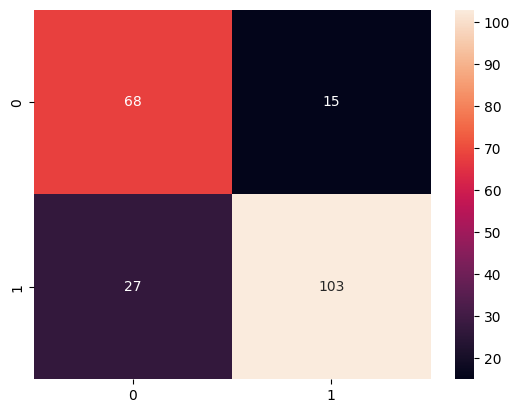

In [42]:
plot_confusion_matrix(RF_pred,y_test,'Test')

In [43]:
precision_score(RF_pred,y_test)

0.8728813559322034

In [44]:
recall_score(RF_pred,y_test)

0.7923076923076923

In [45]:
f1_score(RF_pred,y_test)

0.8306451612903226

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test,RF_pred))

              precision    recall  f1-score   support

           0       0.82      0.72      0.76        95
           1       0.79      0.87      0.83       118

    accuracy                           0.80       213
   macro avg       0.81      0.79      0.80       213
weighted avg       0.80      0.80      0.80       213

